[0.  0.  0.  0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.  1.  1. ]


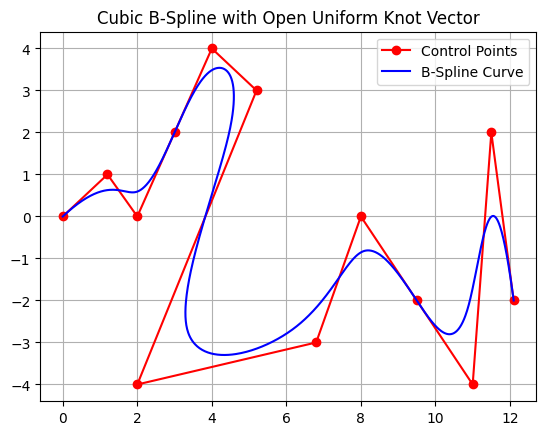

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define degree of the spline
k = 3

# Define control points
control_points = np.array([[0, 0], [1, 2], [2, -1], [3, 3],[4,0],[5,1]])
control_points = np.array([[0,0], [1.2,1], [2,0], [3,2], [4,4], [5.2,3], [2,-4],[6.8,-3], [8,0], [9.5,-2],[11,-4],[11.5,2],[12.1,-2]])
n = len(control_points)

# Create an open uniform knot vector
# Note: For a cubic spline, we need n + k + 1 knots
knots = np.linspace(0, 1, n + k + 1 - 2*k)  # Inner knots
knots = np.concatenate(([0]*k, knots, [1]*k))  # Adding boundary knots
print(knots)

# Create the B-spline
spline = BSpline(knots, control_points, k)

# Evaluate the spline on a fine grid to plot it
t = np.linspace(0, 1, 1000)
spline_values = spline(t)

# Plot the control points
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')

# Plot the B-spline
plt.plot(spline_values[:, 0], spline_values[:, 1], 'b-', label='B-Spline Curve')

plt.title('Cubic B-Spline with Open Uniform Knot Vector')
plt.legend()
plt.grid(True)
plt.show()


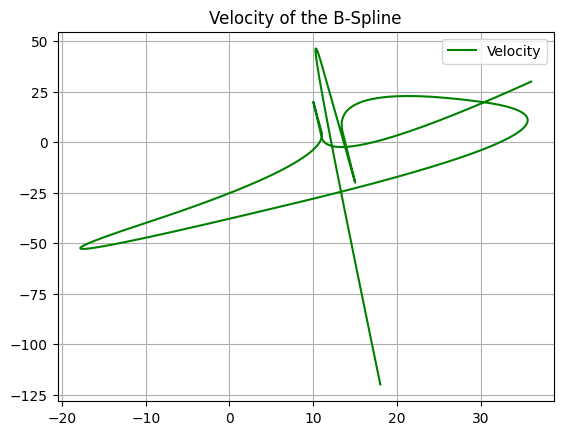

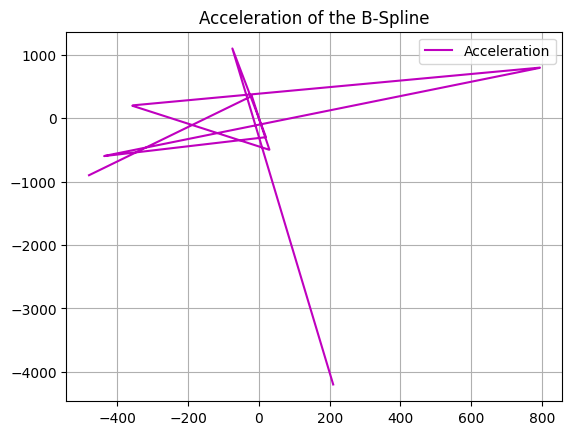

In [27]:
# Compute first and second derivatives (velocity and acceleration)
velocity_spline = spline.derivative(1)
acceleration_spline = spline.derivative(2)

# Evaluate derivatives
velocity_values = velocity_spline(t)
acceleration_values = acceleration_spline(t)

# Plotting the velocity
plt.figure()
plt.plot(velocity_values[:, 0], velocity_values[:, 1], 'g-', label='Velocity')
plt.title('Velocity of the B-Spline')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the acceleration
plt.figure()
plt.plot(acceleration_values[:, 0], acceleration_values[:, 1], 'm-', label='Acceleration')
plt.title('Acceleration of the B-Spline')
plt.legend()
plt.grid(True)
plt.show()


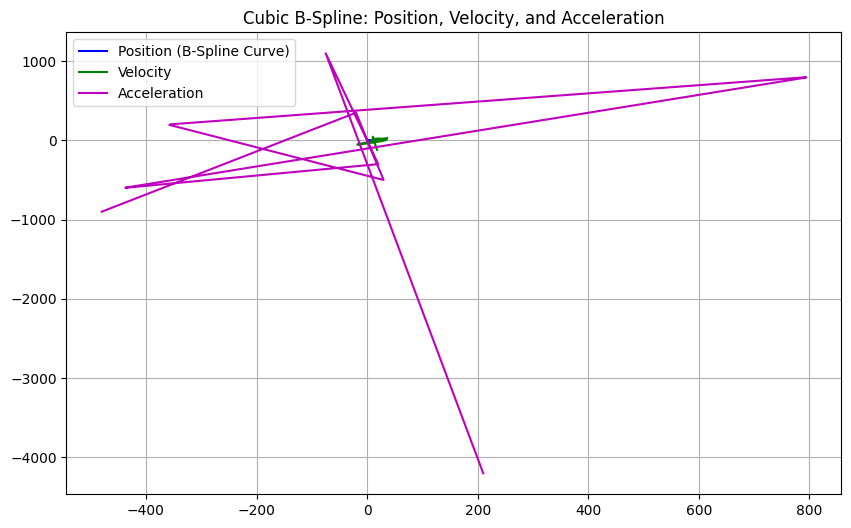

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(spline_values[:, 0], spline_values[:, 1], 'b-', label='Position (B-Spline Curve)')
plt.plot(velocity_values[:, 0], velocity_values[:, 1], 'g-', label='Velocity')
plt.plot(acceleration_values[:, 0], acceleration_values[:, 1], 'm-', label='Acceleration')
plt.title('Cubic B-Spline: Position, Velocity, and Acceleration')
plt.legend()
plt.grid(True)
plt.show()


[0.         0.         0.         0.         0.33333333 0.66666667
 1.         1.         1.         1.        ]


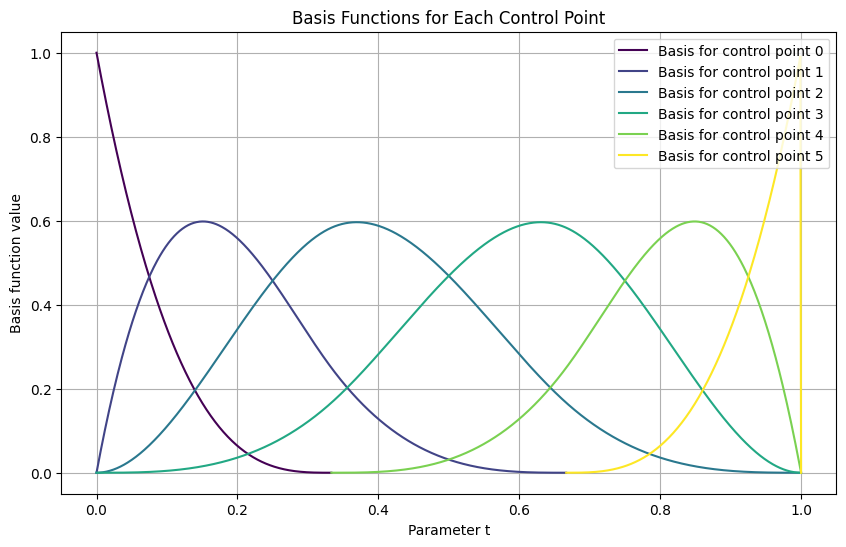

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# # Given setup
# k = 3  # Degree of the spline
# control_points = np.array([[0, 0], [1, 2], [2, -1], [3, 3], [4, 0], [5, 2]])  # Control points
# n = len(control_points)
# knots = np.linspace(0, 1, n + k + 1 - 2*k)  # Inner knots
# knots = np.concatenate(([0]*k, knots, [1]*k))  # Full knot vector
# spline = BSpline(knots, control_points, k)
print(knots)
# Plot setup
t = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each basis function
colors = plt.cm.viridis(np.linspace(0, 1, n))  # Color map for distinguishing basis functions
for i in range(n):
    # Get the basis element for the i-th control point
    basis = BSpline.basis_element(knots[i:i+k+2], extrapolate=False)
    # Evaluate the basis function over the parameter range
    basis_values = basis(t)
    # Plot the basis function
    ax.plot(t, basis_values, label=f'Basis for control point {i}', color=colors[i])

# Adding labels and legend
ax.set_title('Basis Functions for Each Control Point')
ax.set_xlabel('Parameter t')
ax.set_ylabel('Basis function value')
ax.legend(loc='upper right')
ax.grid(True)

# Show plot
plt.show()


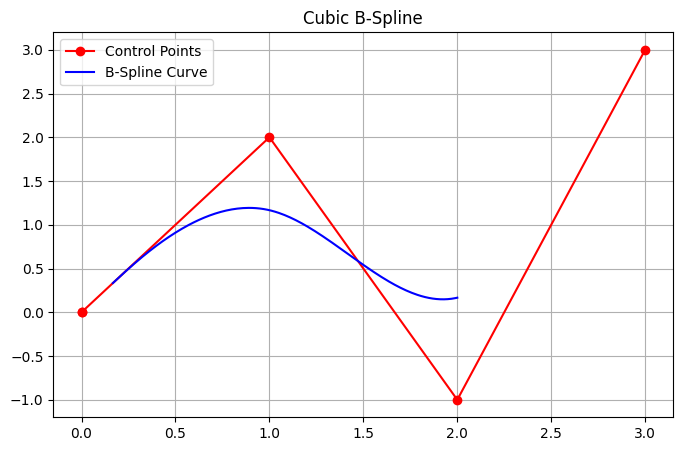

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cubic B-spline basis matrix
M = np.array([
    [-1, 3, -3, 1],
    [3, -6, 3, 0],
    [-3, 0, 3, 0],
    [1, 4, 1, 0]
]) / 6.0

# Control points (Example)

control_points = np.array([[0, 0],[0, 0], [1, 2], [2, -1], [3, 3]])

# Function to calculate curve points
def calculate_spline_points(control_pts, t_values):
    n_points = len(control_pts)
    curve_points = []
    for i in range(n_points - 3):
        P = np.array(control_pts[i:i+4])  # Pick 4 control points at a time
        for t in t_values:
            T = np.array([t**3, t**2, t, 1])
            point = T @ M @ P
            curve_points.append(point)
    return np.array(curve_points)

# Compute spline points
t_values = np.linspace(0, 1, 100)
spline_points = calculate_spline_points(control_points, t_values)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(control_points[:, 0], control_points[:, 1], 'ro-', label='Control Points')
plt.plot(spline_points[:, 0], spline_points[:, 1], 'b-', label='B-Spline Curve')
plt.title('Cubic B-Spline')
plt.legend()
plt.grid(True)
plt.show()


[0.  0.  0.  0.  0.5 1.  1.  1.  1. ] [1. 0. 0. 0. 0.]
[0.  0.  0.  0.  0.5 1.  1.  1.  1. ] [0. 1. 0. 0. 0.]
[0.  0.  0.  0.  0.5 1.  1.  1.  1. ] [0. 0. 1. 0. 0.]
[0.  0.  0.  0.  0.5 1.  1.  1.  1. ] [0. 0. 0. 1. 0.]
[0.  0.  0.  0.  0.5 1.  1.  1.  1. ] [0. 0. 0. 0. 1.]


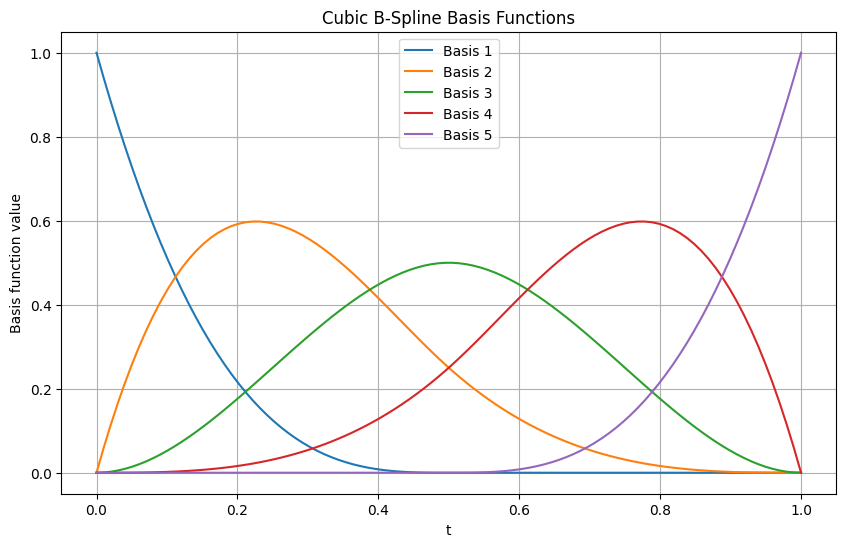

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

# Define the knot vector
knots = np.array([0, 0, 0, 0, 0.5, 1, 1, 1, 1])
degree = 3  # Cubic B-spline

# Create a range of values for t within the domain of the B-spline
t = np.linspace(0, 1, 100)

# Number of basis functions: number of knots - degree - 1
n_basis = len(knots) - degree - 1

# Plot each basis function
plt.figure(figsize=(10, 6))
for i in range(n_basis):
    # Coefficients: 1 for the active basis function, 0 otherwise
    c = np.zeros(n_basis)
    c[i] = 1
    print(knots,c)
    spline = BSpline(knots, c, degree)
    plt.plot(t, spline(t), label=f'Basis {i+1}')

plt.title('Cubic B-Spline Basis Functions')
plt.xlabel('t')
plt.ylabel('Basis function value')
plt.legend()
plt.grid(True)
plt.show()

